In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [69]:
X = pd.read_csv('C:\\Users\\DELL\\Desktop\\AI ML\\DATA SETS\\Unsupervised Data Set (Unlabeled)\\CC GENERAL.csv')
X = X.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


In [71]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268879
3,-0.481656,-0.097609
4,-0.563512,-0.482506


In [72]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_
print(np.unique(labels,return_counts=True))

(array([-1,  0,  1,  2], dtype=int64), array([  23, 8920,    3,    4], dtype=int64))


In [73]:
colors={}
colors[0]='r'
colors[1]='g'
colors[2]='b'
colors[-1]='k'
cvec = [colors[label] for label in labels]

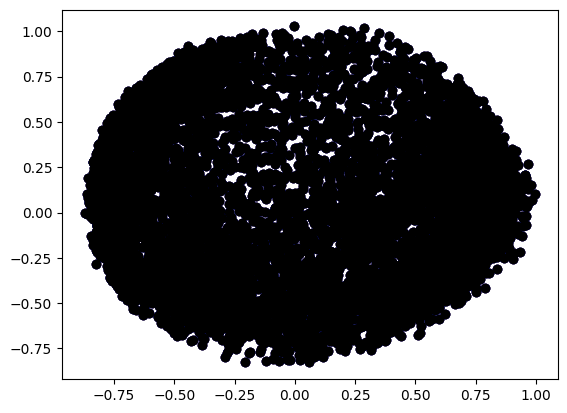

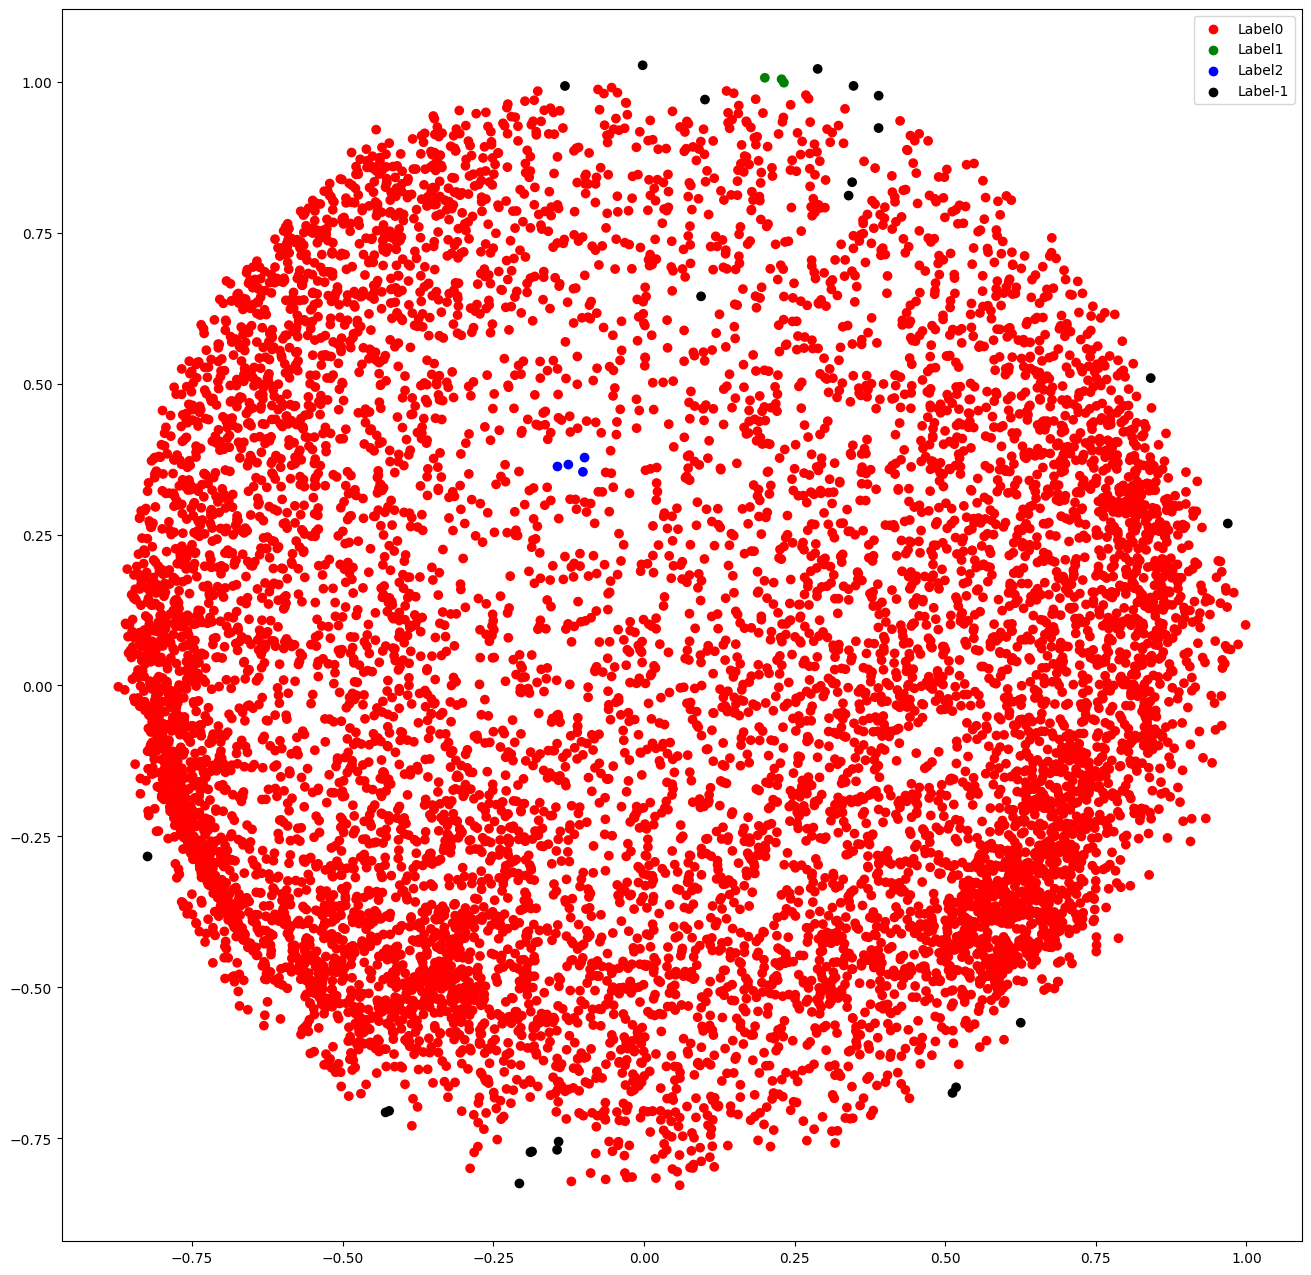

In [74]:
r = plt.scatter(X_principal['P1'],X_principal['P2'],color='r')
g = plt.scatter(X_principal['P1'],X_principal['P2'],color='g')
b = plt.scatter(X_principal['P1'],X_principal['P2'],color='b')
k = plt.scatter(X_principal['P1'],X_principal['P2'],color='k')
figure = plt.figure(figsize=(16,16))
plt.scatter(X_principal['P1'],X_principal['P2'],c=cvec)
plt.legend((r,g,b,k),('Label0',"Label1","Label2","Label-1"))
plt.show()

In [75]:
print(silhouette_score(X_principal,labels))

-0.16145391502716086
